## Polynomial Regression (다항 회귀)

#### 언제 사용?

- 한 개의 변수가 y값과 비선형적인 관계가 있다고 의심되는 경우
- 주기적인 패턴을 보이는 Series 데이터 (sin, cos 등)
- 모델 자체가 복잡해지면 해결가능한 부분이 많음 -> SVM, Tree-based models

#### ex) 집값 예측
- 집값을 예측하는데, depth와 frontag로만 집값을 예측하는 것보다, depth와 frontag를 곱한 넓이 또한 y값에 영향을 줄 것이다.

### Polynomial Features

- 1차 방정식을 고차다항식으로 변경하는 기법

$x_1 + x_2$ -> $x_1 + x_2 + x_1*x_2 + x_1^2 + x_2^2$

- sklearn.preprocessing.PolynomialFeatures 사용

In [6]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = np.arange(6).reshape(3,2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [4]:
poly = PolynomialFeatures(2) # 2차항까지 표현
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [5]:
poly = PolynomialFeatures(interaction_only=True) # 상관관계만 표현
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

## 고차방정식 표현을 위한 Dataset 생성

In [9]:
def f(size):
    x = np.linspace(0, 5, size)
    y = x * np.sin(x**2) + 1
    return (x, y)

def sample(size):
    x = np.linspace(0, 5, size)
    y = x * np.sin(x**2) + 1 + np.random.randn(x.size) * 0.5
    return (x, y)

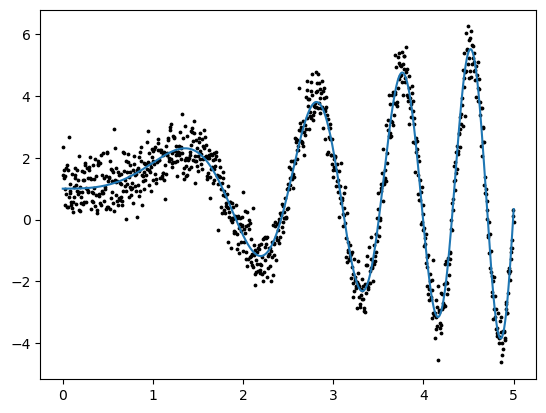

In [10]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
X, y = sample(1000)
plt.scatter(X, y, s=3, c='black')
plt.show()

In [11]:
X.shape, y.shape

((1000,), (1000,))

In [12]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
X.shape, y.shape

((1000, 1), (1000, 1))

In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

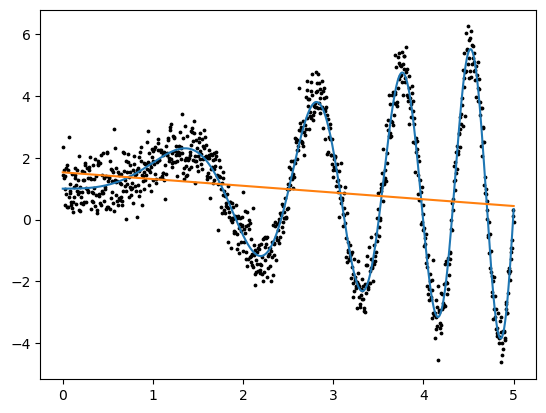

In [14]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X, y, s=3, c='black')
plt.plot(X.flatten(), lr.predict(X).flatten())
plt.show()

- 위의 그림은 적합(fitting)이 잘 되지 않은 모습임
- 더 잘 fitting 시키기 위해서 Polynomial Regression

In [15]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
X_poly[:10]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.00500501e-03, 2.50500751e-05],
       [1.00000000e+00, 1.00100100e-02, 1.00200300e-04],
       [1.00000000e+00, 1.50150150e-02, 2.25450676e-04],
       [1.00000000e+00, 2.00200200e-02, 4.00801202e-04],
       [1.00000000e+00, 2.50250250e-02, 6.26251878e-04],
       [1.00000000e+00, 3.00300300e-02, 9.01802704e-04],
       [1.00000000e+00, 3.50350350e-02, 1.22745368e-03],
       [1.00000000e+00, 4.00400400e-02, 1.60320481e-03],
       [1.00000000e+00, 4.50450450e-02, 2.02905608e-03]])

In [21]:
lr = LinearRegression()
lr.fit(X_poly, y)

LinearRegression()

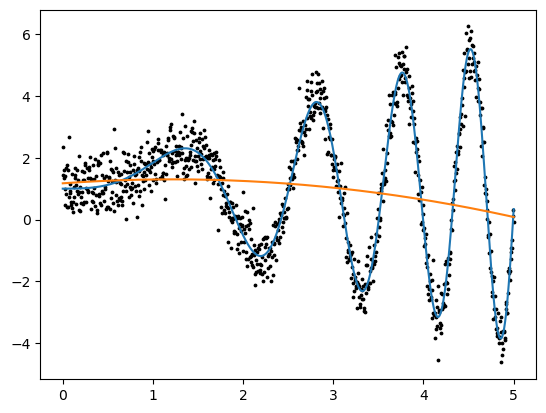

In [22]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c='black')
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show()

- 아까보다는 나은 결과이지만, 여전히 fitting이 잘 됐다고 말할 수 없음
- degree 올리면서 결과 확인

In [28]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=16)
X_poly = poly_features.fit_transform(X)

In [29]:
lr = LinearRegression()
lr.fit(X_poly, y)

LinearRegression()

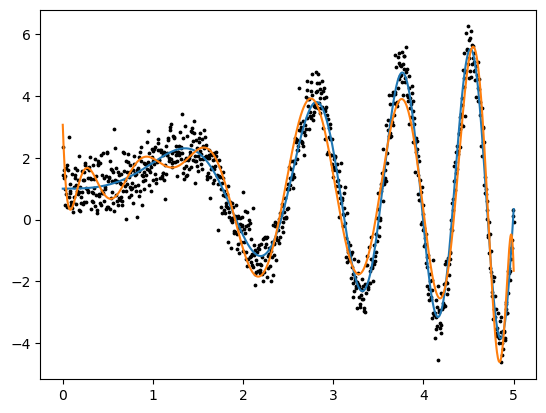

In [30]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c='black')
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show()

- 많이 fitting된 모습

### How to optimize?

- RMSE의 최소값을 찾자
- Ridge, Lasso, LR 모두 다 써보기
- Degree를 10 ~ 50까지 써보기
- 결과를 한눈에 정리해보기

In [31]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [33]:
poly_range = list(range(10 ,50))  # poly_range에 10~50까지의 값 넣기
rmse_lr_list = []
rmse_lasso_list = []
rmse_ridge_list = []

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

for poly_value in poly_range:  # poly_value로 하나씩 부름
    poly_features = PolynomialFeatures(degree=poly_value)
    X_poly = poly_features.fit_transform(X)

    lr = LinearRegression()  # Linear Regression 확인
    lr.fit(X_poly, y)
    rmse_lr_list.append(rmse(lr.predict(X_poly), y))

    lasso = Lasso()  # lasso 확인
    lasso.fit(X_poly, y)
    rmse_lasso_list.append(rmse(lasso.predict(X_poly), y))

    ridge = Ridge()  # Ridge 확인
    ridge.fit(X_poly, y)
    rmse_ridge_list.append(rmse(ridge.predict(X_poly), y))

/Users/kwon-yong-geun/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.082e+03, tolerance: 4.553e-01
  model = cd_fast.enet_coordinate_descent(
/Users/kwon-yong-geun/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.076e+03, tolerance: 4.553e-01
  model = cd_fast.enet_coordinate_descent(
/Users/kwon-yong-geun/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.00523e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwri

In [34]:
import pandas as pd
from pandas import DataFrame
data = {'poly_range' : poly_range , 'lr_rmse ' : rmse_lr_list,
        'lasso_rmse' : rmse_lasso_list, 'ridge_rmse' : rmse_ridge_list}

df = DataFrame(data).set_index('poly_range')
df

,lr_rmse,lasso_rmse,ridge_rmse
poly_range,,,
10,1.925464,2.221196,1.950168
11,1.920334,2.228763,1.931183
12,1.642226,2.233379,1.930228
13,1.362370,2.236084,1.904275
14,1.348207,2.237744,1.731999
15,0.913865,2.238738,1.501753
16,0.710344,2.239256,1.510195
17,0.686989,2.239411,1.309637
18,0.715370,2.239292,0.885554


In [36]:
# ridge가 최소
df.min()

lr_rmse       0.534775
lasso_rmse    2.221196
ridge_rmse    0.521091
dtype: float64

In [37]:
# rmse가 가장 작은 ridge를 sorting
df['ridge_rmse'].sort_values().head()

poly_range
24    0.521091
22    0.533990
23    0.535155
21    0.611859
26    0.657543
Name: ridge_rmse, dtype: float64

In [41]:
# rmse가 가장 작은 degree인 24로 학습
poly_features = PolynomialFeatures(degree=24)
X_poly = poly_features.fit_transform(X)
ridge = Ridge(fit_intercept=False)
ridge.fit(X_poly, y)

Ridge(fit_intercept=False)

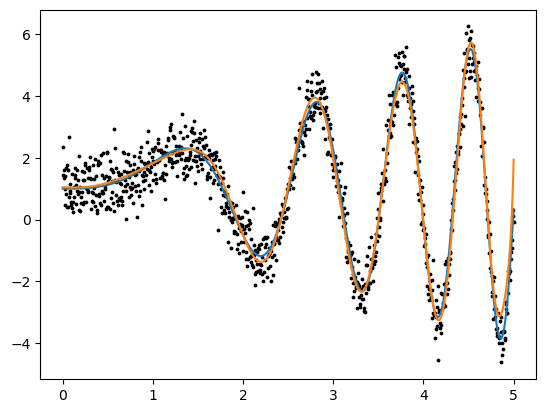

In [42]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c='black')
plt.plot(X.flatten(), ridge.predict(X_poly).flatten())
plt.show()

In [43]:
import pandas as pd
from pandas import DataFrame
data = {"poly_range":poly_range, "lr_rmse":rmse_lr_list, 
        "lasso_rmse":rmse_lasso_list,"ridge_rmse":rmse_ridge_list}
df = DataFrame(data).set_index("poly_range")
df

,lr_rmse,lasso_rmse,ridge_rmse
poly_range,,,
10,1.925464,2.221196,1.950168
11,1.920334,2.228763,1.931183
12,1.642226,2.233379,1.930228
13,1.362370,2.236084,1.904275
14,1.348207,2.237744,1.731999
15,0.913865,2.238738,1.501753
16,0.710344,2.239256,1.510195
17,0.686989,2.239411,1.309637
18,0.715370,2.239292,0.885554


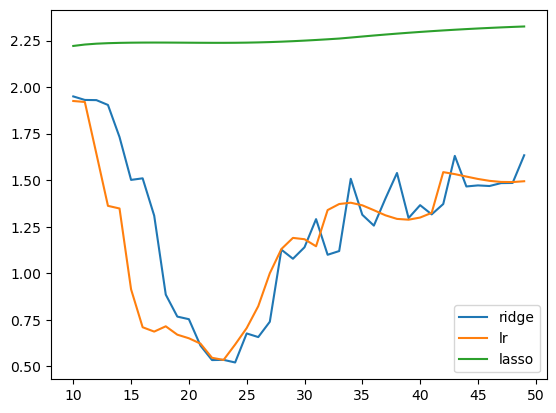

In [44]:
plt.plot(poly_range, df["ridge_rmse"], label="ridge")
plt.plot(poly_range, df["lr_rmse"], label="lr")
plt.plot(poly_range, df["lasso_rmse"], label="lasso")
plt.legend()
plt.show()